In [ ]:
#Model from the 2003 paper "EFFECTS OF FIRE AND HERBIVORY ON THE STABILITY OF SAVANNA ECOSYSTEMS"
#code modified from: http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

import numpy as np
from scipy import integrate

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
#Define parameters
u=0.6;
rh=1.0;
rw=0.5;
dh=0.9; dw=0.4;
alpha=0.4;
beta=300;
p=1;
kh=0.1; #fire parameters are set to 0 in simplified model below
kw=0.01;
n=0.1;
a=0.5; 


In [26]:
#Three possible scenarios
#Scenario A: w_in=250 < beta
#Scenario B: w_in=500 > beta
#Scenario C: w_in =750 >> beta

scenario="C"


In [27]:
#Define scenario and resulting win (water in), ws, wt parameters (rate of water recharge)
if (scenario=="A"):
     win=250
elif (scenario=="B"):
     win=500
elif (scenario=="C"):
        win=750
        
def ws(alpha,beta,win):
    if win>beta:
        return alpha*(win-beta)
    else:
        return 0
    
ws=ws(alpha,beta,win)
wt=win-ws

print("Working with scenario "+str(scenario))
print("Water in: "+str(win))
print("Rate of moisture recharge in grass root zone: "+str(wt))
print("Rate of moisture recharge in tree root zone: "+str(ws))

Working with scenario C
Water in: 750
Rate of moisture recharge in grass root zone: 570.0
Rate of moisture recharge in tree root zone: 180.0


In [28]:
#Define simplified model
def H_dot(H,W):
    return rh*wt*(H)/(H+u*W+p*ws)-dh*H
def W_dot(H,W):
    return rw*(wt*(u*W)/(H+u*W+p*ws)+ws)-dw*W

#Define function to compute the state of the system at different time steps
#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    h.append(iv1)
    w.append(iv2)
    # compute and fill lists
    for i in range(time):
        h.append(h[i] + (H_dot(h[i],w[i])) * dt) #taylor series approximation truncated after linear terms
        w.append(w[i] + (W_dot(h[i],w[i])) * dt)
    return h, w


In [29]:
# initialize lists containing values
h = []
w = []
sys(500, 1000, 0.1, 750); #initializing with initial values for H,W, time step .1 years, 1000 years

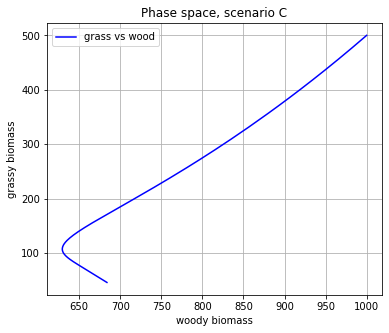

In [30]:
fig = plt.figure(figsize=(6,5))
plt.plot(w, h, 'b-', label='grass vs wood')
plt.title("Phase space, scenario "+str(scenario))
plt.legend(loc='best')
plt.xlabel("woody biomass")
plt.ylabel("grassy biomass")
plt.grid()


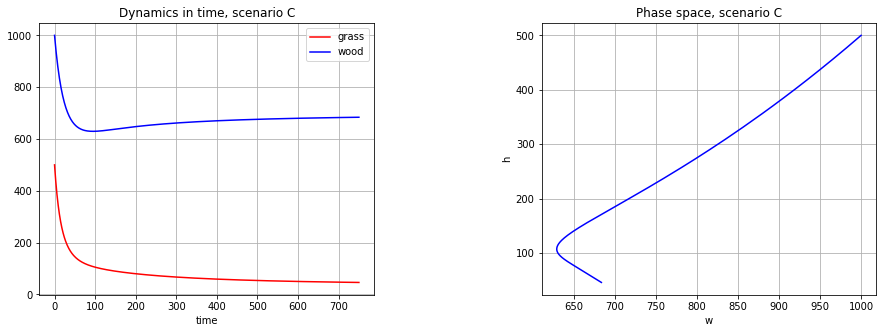

In [31]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(h, 'r-', label='grass')
ax1.plot(w, 'b-', label='wood')
ax1.set_title("Dynamics in time, scenario "+str(scenario))
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(w, h, color="blue")
ax2.set_xlabel("w")
ax2.set_ylabel("h")  
ax2.set_title("Phase space, scenario "+str(scenario))
ax2.grid()

In [32]:
#finding fixed points symbolically
import sympy as sm
# define the system in this way--assuming positive phase space only
h, w = sm.symbols('h, w', negative=False)
hdot = rh*wt*(h)/(h+u*w+p*ws)-dh*h
wdot = rw*(wt*(u*w)/(h+u*w+p*ws)+ws)-dw*w



# use sympy's way of setting equations to zero
hdotEqual = sm.Eq(hdot, 0)
wdotEqual = sm.Eq(wdot, 0)

# compute fixed points
null_h_dot= sm.solve(hdotEqual,h)
null_w_dot=sm.solve(wdotEqual,h)
equilibria = sm.solve( (hdotEqual, wdotEqual), h, w )
print("The values that make dh/dt zero are "+str(null_h_dot)) #where dhdt=0
print("The values that make dw/dt zero are "+str(null_w_dot)) #where dwdt=0
print("***** The resulting equilibria are" +str(equilibria)+ "****") #where nullclines intersect

The values that make dh/dt zero are [0.0, 453.333333333333 - 0.6*w]
The values that make dw/dt zero are [0.3*(-2.0*w**2 + 1275.0*w + 135000.0)/(w - 225.0)]
***** The resulting equilibria are[(9.68147978712330e-122, 729.969603739900), (37.9487179487179, 692.307692307692)]****


In [33]:
h_nullcline=null_h_dot[1]
w_nullcline=null_w_dot[0]

print(h_nullcline)
print(w_nullcline)

453.333333333333 - 0.6*w
0.3*(-2.0*w**2 + 1275.0*w + 135000.0)/(w - 225.0)


In [34]:
#define plotting ranges for w to avoid singularities
if (scenario=="A"):
    w0=0
elif (scenario=="B"):
      w0=101
elif (scenario=="C"):
     w0=226
print(w0)

226


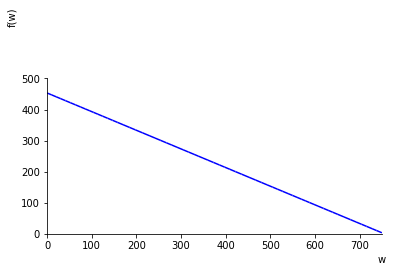

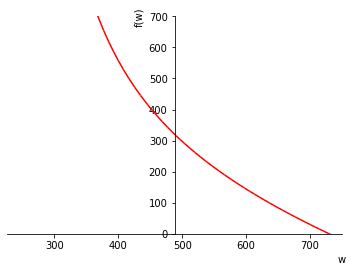

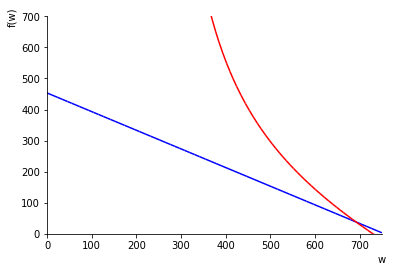

In [36]:
#plot nullclines
from sympy.plotting import plot
p1=plot(h_nullcline,(w,0,750), line_color='b',  ylim=[0,700])
p2=plot(w_nullcline, (w,w0,750),Show=False, line_color='r',ylim=[0,700])
p1.append(p2[0])
p1.show()